In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
import matplotlib
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
X['sepal width (cm)']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

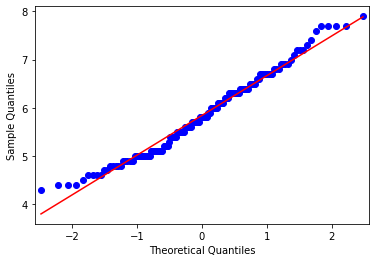

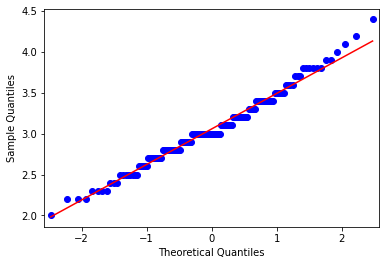

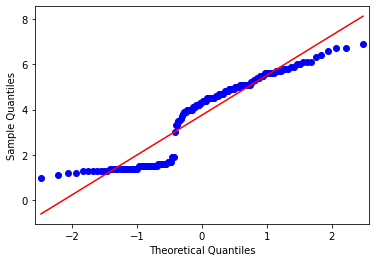

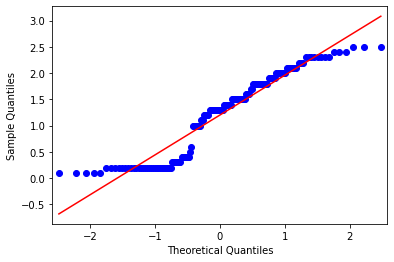

In [7]:
for i in range(4):
    sm.qqplot(X.iloc[:, i], line='s')
    
plt.show()

In [ ]:
Можно увидеть что два столбца распределенны нормально,а два нет. Отнормируем данные.

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X = pd.DataFrame(X,columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


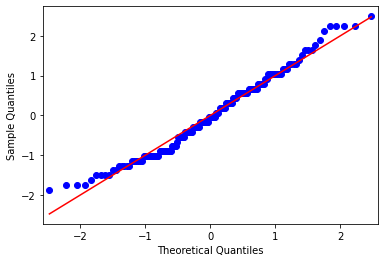

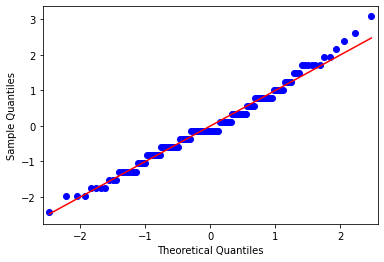

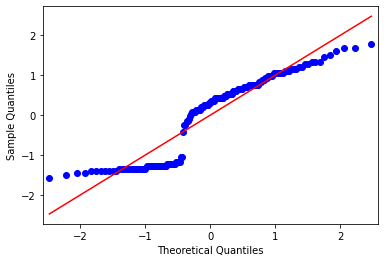

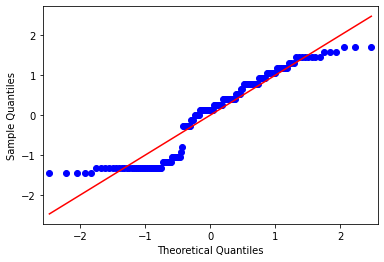

In [19]:
for i in range(4):
    sm.qqplot(X.iloc[:, i], line='s')
    
plt.show()

In [20]:
knn_class = KNeighborsClassifier()
knn_class.fit(X,y)

KNeighborsClassifier()

In [21]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

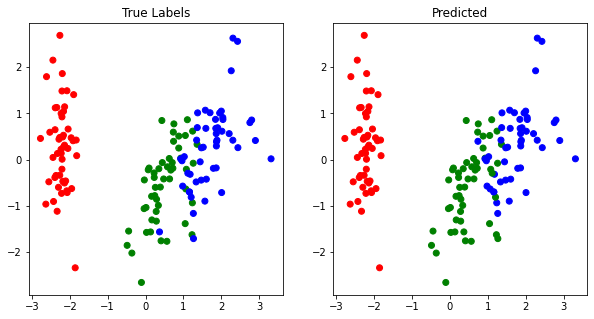

In [24]:
plt.figure(figsize=(10, 5))

y_predicted = knn_class.predict(X)
colors = ['red', 'green', 'blue']

plt.subplot(1, 2, 1)
plt.title('True Labels')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.subplot(1, 2, 2)
plt.title('Predicted')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predicted, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()